In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('dataset/example.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


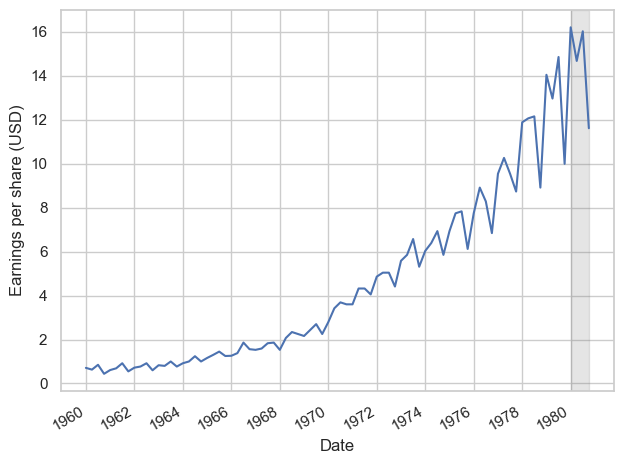

In [24]:
# Visualizing the time series

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data using Seaborn's lineplot
sns.lineplot(data=df, x='date', y='data', ax=ax)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Shaded background, to be predicted
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Customize x-axis ticks
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()

plt.tight_layout()

# Show the plot
plt.show()

In [4]:
train = df[:-4]
test = df[-4:]

    Implementing historical mean

In [5]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [6]:
test['pred_mean'] = historical_mean

test

C:\Users\arunk\AppData\Local\Temp\ipykernel_12024\2333394055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_mean'] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [7]:
# Function that calculates the Mean absolute percentage error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
# Calculating MAPE
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(f'MAPE of Historical Mean : {mape_hist_mean:.2f}%')

MAPE of Historical Mean : 70.01%


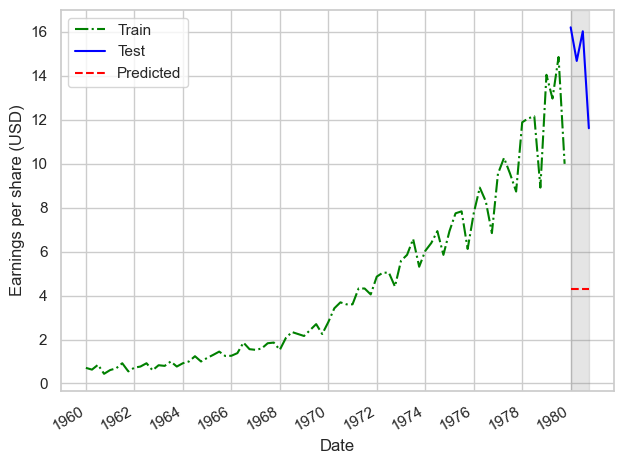

In [9]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training data in green dashed line
sns.lineplot(data=train, x='date', y='data', ax=ax, color='green', linestyle='-.', label='Train')

# Plot the test data in blue solid line
sns.lineplot(data=test, x='date', y='data', ax=ax, color='blue', label='Test')

# Plot the predicted data in red dashed line
sns.lineplot(data=test, x='date', y='pred_mean', ax=ax, color='red', linestyle='--', label='Predicted')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Add a shaded background between x-axis values 80 and 83
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Add a legend in the upper-left corner
ax.legend(loc='upper left')

# Customize x-axis ticks
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Rotate and format x-axis date labels for better readability
fig.autofmt_xdate()

# Ensure the plot fits nicely within the figure
plt.tight_layout()

# Show the plot
plt.show()

    Forecasting using Last year's Mean

In [10]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [11]:
test['pred__last_yr_mean'] = last_year_mean

test

C:\Users\arunk\AppData\Local\Temp\ipykernel_12024\3613248237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred__last_yr_mean'] = last_year_mean


,date,data,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [12]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

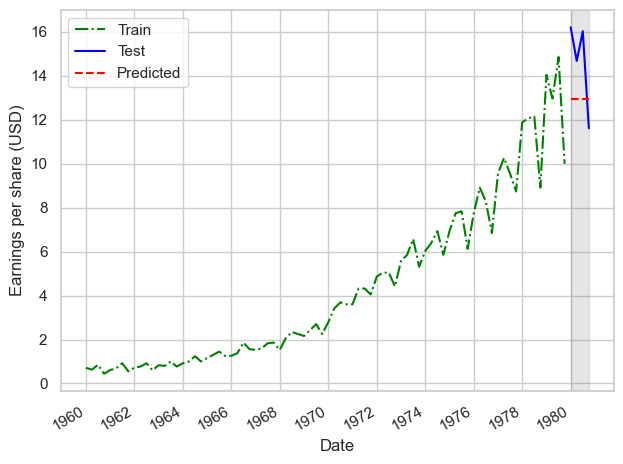

In [13]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training data in green dashed line
sns.lineplot(data=train, x='date', y='data', ax=ax, color='green', linestyle='-.', label='Train')

# Plot the test data in blue solid line
sns.lineplot(data=test, x='date', y='data', ax=ax, color='blue', label='Test')

# Plot the predicted data in red dashed line
sns.lineplot(data=test, x='date', y='pred__last_yr_mean', ax=ax, color='red', linestyle='--', label='Predicted')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Add a shaded background between x-axis values 80 and 83
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Add a legend in the upper-left corner
ax.legend(loc='upper left')

# Customize x-axis ticks
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Rotate and format x-axis date labels for better readability
fig.autofmt_xdate()

# Ensure the plot fits nicely within the figure
plt.tight_layout()

# Show the plot
plt.show()

    Implementing last know value to forecast

In [14]:
last = train['data'].iloc[-1]
last

9.99

In [15]:
test.loc[:, 'pred_last'] = last

test

C:\Users\arunk\AppData\Local\Temp\ipykernel_12024\1150534152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


,date,data,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [16]:
# Calculating MAPE
mape_last = mape(test['data'], test['pred_last'])
print(f'MAPE of last year : {mape_last:.2f}%')

30.457277908606535

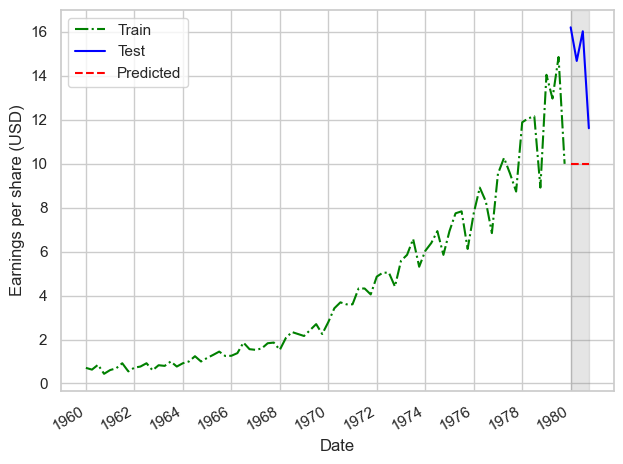

In [17]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training data in green dashed line
sns.lineplot(data=train, x='date', y='data', ax=ax, color='green', linestyle='-.', label='Train')

# Plot the test data in blue solid line
sns.lineplot(data=test, x='date', y='data', ax=ax, color='blue', label='Test')

# Plot the predicted data in red dashed line
sns.lineplot(data=test, x='date', y='pred_last', ax=ax, color='red', linestyle='--', label='Predicted')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Add a shaded background between x-axis values 80 and 83
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Add a legend in the upper-left corner
ax.legend(loc='upper left')

# Customize x-axis ticks
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Rotate and format x-axis date labels for better readability
fig.autofmt_xdate()

# Ensure the plot fits nicely within the figure
plt.tight_layout()

# Show the plot
plt.show()

    Implementing Naive Seasonal Forecast
        This forecast take the last observed cycle and repests it into the future.

In [18]:
test['pred_last_season'] = train['data'][-4:].values

test

C:\Users\arunk\AppData\Local\Temp\ipykernel_12024\2273785734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_last_season'] = train['data'][-4:].values


,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [26]:
# Calculating MAPE
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(f'MAPE of naive : {mape_naive_seasonal:.2f}%')

MAPE of naive : 11.56%


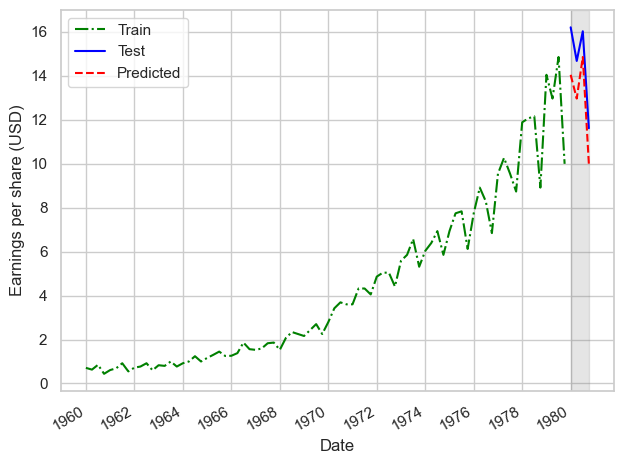

In [20]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training data in green dashed line
sns.lineplot(data=train, x='date', y='data', ax=ax, color='green', linestyle='-.', label='Train')

# Plot the test data in blue solid line
sns.lineplot(data=test, x='date', y='data', ax=ax, color='blue', label='Test')

# Plot the predicted data in red dashed line
sns.lineplot(data=test, x='date', y='pred_last_season', ax=ax, color='red', linestyle='--', label='Predicted')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# Add a shaded background between x-axis values 80 and 83
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Add a legend in the upper-left corner
ax.legend(loc='upper left')

# Customize x-axis ticks
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Rotate and format x-axis date labels for better readability
fig.autofmt_xdate()

# Ensure the plot fits nicely within the figure
plt.tight_layout()

# Show the plot
plt.show()

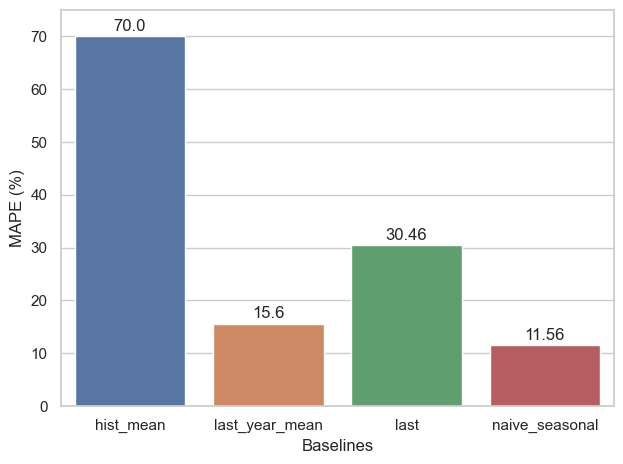

In [25]:
# Data for the bar chart
x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar chart using Seaborn's barplot
sns.barplot(x=x, y=y, ax=ax)

# Set labels and title
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

# Add data labels above the bars
for index, value in enumerate(y):
    plt.text(index, value + 1, str(value), ha='center')

# Ensure the plot fits nicely within the figure
plt.tight_layout()

# Show the plot
plt.show()

    Inference :
        Out of four base-model, 
            *Arithmetic Mean
            *Mean of the last year
            *Last Know value
            *Naive Seasonal Forecast
        
    We choose "Naive Method" as it has lower MAPE value.